In [2]:
import collections
import math
import os
import random
import numpy as np
import pandas as pd
# import tensorflow as tf

## 1、疾病相似度

In [3]:
df = pd.read_pickle('data_ready.pkl')

In [4]:
df.sample(5)

,OUT_HOSP_DIAGNOSISNAME_n,medlist_n
758199,"[感冒, 慢性咽炎]","[复方氨酚烷胺, 头孢呋辛, 酮替芬, 可使用的中草药, 间接喉镜检查, 头孢丙烯, 酚麻美..."
864548,"[输尿管结石, 肾盂积水伴肾输尿管结石]","[异帕米星, 一般诊疗费, 氯化钠, 山莨菪碱, 地塞米松, 氯化钠]"
238458,"[肠系膜淋巴结炎, 附睾炎]","[自费一次性材料, 氯化钠, 地塞米松, 氯化钠, 葡萄糖, 阿奇霉素, 氯化钠, 头孢噻肟..."
616263,[前列腺增生上呼吸道感染],"[普乐安胶囊, 强力枇杷露, 一般诊疗费]"
82863,"[肺部感染, 哮喘, 间质性]","[复方甲氧那明, 克拉霉素]"


In [4]:
# word2id, id2word = dict(), dict()
# for line in df.itertuples():
    
# #     print(line)
#     line[1].extend(line[2])
#     for i in line[1]:
#         if i not in word2id:
#             word2id[i] = len(word2id)
# id2word = dict(zip(word2id.values(), word2id.keys()))

In [5]:
# # Data size
# print('Data size', len(word2id))

In [6]:
# def t(arr):
    
#     return [word2id[i] for i in list(arr)]

# df['nameid'] = df['OUT_HOSP_DIAGNOSISNAME_n'].apply(t)
# df['medlistid'] = df['medlist_n'].apply(t)

In [5]:
df.shape

(145129, 2)

In [6]:
import random
# import tqdm
from matplotlib.cbook import flatten
train_set = []
count = 0
# for line in df.iloc[:20000, :].itertuples():
for line in df.itertuples():
    if count % 10000 == 0:
        print(count)
        print(len(train_set))
    count += 1
    t2 = [i for i in line[2] if i not in line[1]]
    
    for i in line[1]:
        tl = [i] * len(t2)
#         tt = len(t2)//2 + 1
#         if tt > 9:
#             tt = 9
        tc = list(flatten(zip(tl, t2)))
        train_set.append(tc)
#         for _ in range(tt):
#             random.shuffle(t2)
#             tc = list(flatten(zip(tl, t2)))
#             train_set.append(tc)
            

0
0
10000
17801
20000
37446
30000
60130
40000
83079
50000
105065
60000
129689
70000
152113
80000
177302
90000
200172
100000
225380
110000
249263
120000
273376
130000
299341
140000
323141


In [7]:
len(df.iloc[0,1])

18689

In [8]:
len(train_set[1])

461116

In [9]:
print(len(train_set))

337013


In [11]:
# print(train_set[0])

['胰腺炎', '普通病房床位费', '胰腺炎', '住院诊查费', '胰腺炎', '静脉输液', '胰腺炎', '自费诊疗及服务项目', '胰腺炎', '静脉输液', '胰腺炎', '氯化钠', '胰腺炎', '非洛地平', '胰腺炎', '莫沙必利', '胰腺炎', '莫沙必利', '胰腺炎', '维生素B6', '胰腺炎', '泮托拉唑', '胰腺炎', '维生素C', '胰腺炎', '复方甘草甜素', '胰腺炎', '葡萄糖氯化钠', '胰腺炎', '氯化钾', '胰腺炎', '维生素B6', '胰腺炎', '泮托拉唑', '胰腺炎', '维生素C', '胰腺炎', '复方甘草甜素', '胰腺炎', '氯化钾', '胰腺炎', '葡萄糖氯化钠', '胰腺炎', '氯化钠', '胰腺炎', '葡萄糖', '胰腺炎', '等级护理', '胰腺炎', '自费诊疗及服务项目', '胰腺炎', '氯化钾', '胰腺炎', '氯化钾', '胰腺炎', '葡萄糖', '胰腺炎', '硝苯地平', '胰腺炎', '等级护理', '胰腺炎', '维生素B6', '胰腺炎', '泮托拉唑', '胰腺炎', '维生素C', '胰腺炎', '自费诊疗及服务项目', '胰腺炎', '葡萄糖氯化钠', '胰腺炎', '复方甘草甜素', '胰腺炎', '氯化钠', '胰腺炎', '氯化钾', '胰腺炎', '氯化钾', '胰腺炎', '葡萄糖', '胰腺炎', '静脉输液', '胰腺炎', '自费诊疗及服务项目', '胰腺炎', '普通病房床位费', '胰腺炎', '住院诊查费', '胰腺炎', '非洛地平', '胰腺炎', '莫沙必利', '胰腺炎', '莫沙必利', '胰腺炎', '莫沙必利', '胰腺炎', '维生素B6', '胰腺炎', '泮托拉唑', '胰腺炎', '维生素C', '胰腺炎', '复方甘草甜素', '胰腺炎', '氯化钾', '胰腺炎', '氯化钾', '胰腺炎', '葡萄糖氯化钠', '胰腺炎', '氯化钠', '胰腺炎', '葡萄糖', '胰腺炎', '等级护理', '胰腺炎', '自费诊疗及服务项目', '胰腺炎', '静脉输液', '胰腺炎', '自费诊疗及服务项目', '胰腺炎', '非洛地平', '胰腺炎', '莫沙必利', '胰腺炎', '普通病房

In [10]:
from gensim.models import Word2Vec
import multiprocessing
from datetime import datetime

In [11]:
print(datetime.now())
model = Word2Vec(train_set, size=128, window=3, min_count=1,
        workers=multiprocessing.cpu_count(), iter=5)
print(datetime.now())

2019-05-24 11:42:32.799390
2019-05-24 11:43:50.166229


In [12]:
print(datetime.now())
model1 = Word2Vec(train_set, size=128, window=3, min_count=1,
        workers=multiprocessing.cpu_count(), iter=10)
print(datetime.now())

2019-05-24 11:43:50.174513
2019-05-24 11:46:11.885925


In [15]:
# print(datetime.now())
# model1 = Word2Vec(train_set, size=512, window=3, min_count=1,
#         workers=multiprocessing.cpu_count())
# print(datetime.now())

2019-05-24 11:23:37.076696
2019-05-24 11:24:52.680412


In [13]:
model.wv.__getitem__('胰腺炎')

array([-1.33275688e+00,  2.82141715e-01, -3.69876474e-01, -8.18796754e-01,
       -1.25058666e-01, -1.23170257e+00, -1.30654716e+00, -3.28768224e-01,
        1.55677319e+00, -9.21229661e-01,  2.92573869e-01,  3.95237617e-02,
       -2.07180119e+00, -1.25367546e+00, -4.23585355e-01,  2.27354109e-01,
       -1.18159664e+00, -3.16919774e-01,  1.66128945e+00, -1.14426243e+00,
       -1.10590971e+00, -1.12078893e+00,  5.96275516e-02, -6.52856290e-01,
       -6.69761837e-01, -1.86680138e-01, -4.68737423e-01, -8.85834277e-01,
        1.92187679e+00, -7.72111535e-01, -5.52030206e-01, -5.50317228e-01,
        8.04249048e-01,  7.29490936e-01, -3.63608897e-01, -4.42302406e-01,
        8.44465673e-01,  4.31760788e-01,  4.84828115e-01, -5.08054376e-01,
       -1.29733488e-01,  1.17751718e+00, -3.66386533e-01, -6.95286214e-01,
       -2.08433658e-01, -2.08674565e-01, -6.85269296e-01, -1.46448880e-01,
       -1.01521540e+00, -8.58671188e-01, -1.25114667e+00,  2.38205576e+00,
        7.86778748e-01, -

In [14]:
df.head(20)

,OUT_HOSP_DIAGNOSISNAME_n,medlist_n
0,[胰腺炎],"[普通病房床位费, 住院诊查费, 静脉输液, 自费诊疗及服务项目, 静脉输液, 氯化钠, 非..."
3,[胆囊炎],"[感冒清胶囊, 红霉素, 胆益宁片, 胆康胶囊, 护肝颗粒, 藿胆丸, 一次性输液器, 一次..."
4,[普通病],"[复方氨酚烷胺, 万通筋骨片, 腰痹通胶囊, 康复新液, 维生素B2, 普乐安胶囊, 强肝丸..."
8,"[月经失调, 子宫良性肿]","[止痛化癥颗粒, 血府逐瘀丸, 克林霉素, 头孢丙烯, 替硝唑, 替硝唑, 头孢丙烯, 彩色..."
10,[耳痛],"[省、市离休门诊、住院可使用的一次性材料, 螺旋CT平扫, 六味地黄颗粒, 腰部疾病推拿治疗..."
11,[皮肤挫伤],"[醋氯芬酸, 复方伤痛胶囊, 替扎尼定, 头孢克洛, 小换药, 可吸收缝线, 中清创, 一次..."
14,[高血压],"[阿司匹林, 复方利血平氨苯蝶啶, 厄贝沙坦, 复方酮康唑, 咪康唑, 一般诊疗费, 左旋氨..."
19,[足感染],"[头孢呋辛, 甲硝唑, 氯化钠, 头孢噻肟, 一般诊疗费, 抗链球菌溶血素O测定, 类风湿因..."
20,[疱疹性湿疹],"[一次性注射器, 一次性真空采血器, 静脉采血, 葡萄糖测定, 血常规, 阿昔洛韦, 阿昔洛..."
23,[便血],"[断血流颗粒, 马应龙麝香痔疮膏, 糖类抗原CA-125测定, 总前列腺特异性抗原测定, 糖..."


### 诊断和检查间的关系

In [15]:
import matplotlib.pyplot as plt

In [16]:
l = []
for i in df.iloc[0, 0]:
    for ii in set(df.iloc[0, 1]):
        if i == ii:
            continue
        if ii not in list(df.iloc[1, 1]):
            print(i, ii.strip(), model.wv.similarity(i, ii.strip()))
            l.append(model.wv.similarity(i, ii.strip()))

胰腺炎 经内镜胆管内引流术＋支架置入术 -0.2766757
胰腺炎 骨髓特殊染色及酶组织化学染色检查 -0.03767184
胰腺炎 浙石斛 -0.036511723
胰腺炎 复方苦参注射液 0.37926942
胰腺炎 馒头餐糖耐量试验 0.007459324
胰腺炎 β—内酰胺酶试验 0.07947613
胰腺炎 右旋糖酐 0.17932042
胰腺炎 经十二指肠镜乳头扩张术 -0.023455232
胰腺炎 置管后注药 0.035973273
胰腺炎 门诊病人一般细菌培养及鉴定+药敏 0.020212626
胰腺炎 杭州市副省可使用的西药 -0.11560087
胰腺炎 支架 -0.13063975
胰腺炎 清热灵颗粒 -0.28886932
胰腺炎 胡桃仁 -0.0789365
胰腺炎 置管后注食 0.080818504
胰腺炎 人血白蛋白 0.19675879
胰腺炎 听力筛选试验 0.0035007559
胰腺炎 胃管置管 0.083795704


(array([2., 0., 2., 4., 4., 3., 0., 2., 0., 1.]),
 array([-0.28886932, -0.22205545, -0.15524158, -0.0884277 , -0.02161383,
         0.04520005,  0.11201392,  0.17882779,  0.24564168,  0.31245553,
         0.37926942], dtype=float32),
 <a list of 10 Patch objects>)

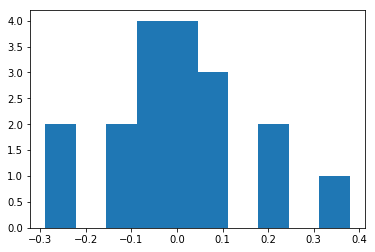

In [17]:
plt.hist(l)

(array([ 17.,  54., 132., 262., 361., 347., 161.,  82.,  25.,  10.]),
 array([-0.30600524, -0.24862795, -0.19125065, -0.13387334, -0.07649605,
        -0.01911876,  0.03825854,  0.09563584,  0.15301314,  0.21039043,
         0.26776773], dtype=float32),
 <a list of 10 Patch objects>)

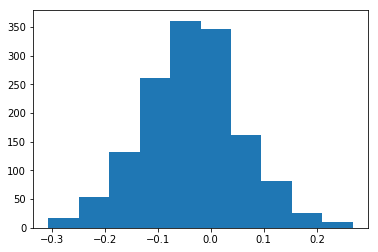

In [18]:
l = []
for i in df.iloc[0, 0]:
    for ii in set(df.iloc[1, 1]):
        if i == ii:
            continue
        if ii not in list(df.iloc[0, 1]):
#             print(i, ii.strip(), model.wv.similarity(i, ii.strip()))
            l.append(model.wv.similarity(i, ii.strip()))

plt.hist(l)

### 诊断之间的关系

In [47]:
model.wv.most_similar("乳腺腺病")

[('乳腺增生', 0.6152059435844421),
 ('乳房肿块', 0.5884671211242676),
 ('乳腺囊性增生病', 0.584717869758606),
 ('月经稀少', 0.5718174576759338),
 ('卵巢囊肿', 0.5690775513648987),
 ('闭经', 0.5665336847305298),
 ('子宫良性肿瘤', 0.560820460319519),
 ('外阴炎', 0.5364402532577515),
 ('霉菌性阴道炎', 0.5359597206115723),
 ('乳腺炎', 0.5354016423225403)]

In [48]:
model1.wv.most_similar("乳腺腺病")

[('乳腺增生', 0.5998362302780151),
 ('闭经', 0.5942680835723877),
 ('乳房结节', 0.590804398059845),
 ('乳腺炎', 0.5691782236099243),
 ('盆腔炎', 0.5686941742897034),
 ('子宫内膜炎', 0.5505416393280029),
 ('卵巢囊肿', 0.546629786491394),
 ('女性更年期综合征', 0.5401734709739685),
 ('月经稀少', 0.5357223153114319),
 ('乳腺纤维囊性增生', 0.5340434312820435)]

In [21]:
model.wv.most_similar("支气管炎")

[('急性咽炎', 0.5674084424972534),
 ('发热', 0.5562918782234192),
 ('肠系膜淋巴结炎', 0.5518053770065308),
 ('皮炎', 0.5466964244842529),
 ('胆囊炎', 0.5408378839492798),
 ('肾结石', 0.5386705994606018),
 ('咽炎', 0.524307370185852),
 ('胃溃疡', 0.5213555097579956),
 ('急性化脓性扁桃腺炎', 0.5209333300590515),
 ('咳嗽', 0.5203779935836792)]

In [22]:
model1.wv.most_similar("支气管炎")

[('急性扁桃体炎', 0.5945945978164673),
 ('急性支气管炎', 0.5730513334274292),
 ('急性咽炎', 0.556013822555542),
 ('咽炎', 0.5520261526107788),
 ('锦灯笼', 0.5353658199310303),
 ('腹痛', 0.5321595072746277),
 ('咳嗽', 0.5308773517608643),
 ('气管炎', 0.5293817520141602),
 ('慢性支气管炎', 0.5287785530090332),
 ('胃肠功能紊乱', 0.5273191332817078)]

In [23]:
model.wv.most_similar("疱疹性湿疹")

[('普通病.', 0.6753534078598022),
 ('刺激性皮炎', 0.6522684097290039),
 ('传染性软疣', 0.6479986906051636),
 ('南板蓝根', 0.6357661485671997),
 ('胃炎性假瘤', 0.6297183632850647),
 ('疱疹病毒性水疱皮炎', 0.6272997856140137),
 ('唇单纯疱疹', 0.6235179901123047),
 ('疱疹感染', 0.6125220060348511),
 ('单纯性疱疹性角膜炎', 0.6124013662338257),
 ('单纯疱疹 NOS', 0.6082894802093506)]

In [24]:
model1.wv.most_similar("疱疹性湿疹")

[('刺激性皮炎', 0.6570743918418884),
 ('疱疹样皮炎', 0.6370149850845337),
 ('单纯性疱疹性角膜炎', 0.6036033034324646),
 ('疱疹病毒性水疱皮炎', 0.5978690981864929),
 ('普通病.', 0.5817050933837891),
 ('唇单纯疱疹', 0.5799508690834045),
 ('斑疹热', 0.5795717239379883),
 ('人为性皮炎', 0.5789394378662109),
 ('病毒疹', 0.5725350379943848),
 ('带状疱疹伴眼部并发症', 0.571586012840271)]

In [25]:
model.wv.most_similar("便血")

[('呕血', 0.5758874416351318),
 ('结肠假息肉病', 0.5606940984725952),
 ('胃溃疡伴出血', 0.5244824886322021),
 ('胆囊脓肿', 0.5185791254043579),
 ('肛瘘', 0.5041430592536926),
 ('胰腺炎', 0.4948684573173523),
 ('结肠息肉术后;', 0.4938068389892578),
 ('直肠息肉', 0.49353867769241333),
 ('肝硬化腹水', 0.4863991141319275),
 ('[ZZJ', 0.4849182665348053)]

In [26]:
model1.wv.most_similar("便血")

[('呕血', 0.5511826872825623),
 ('胃溃疡伴穿孔', 0.5355203151702881),
 ('胃溃疡伴出血', 0.5330836772918701),
 ('胆囊脓肿', 0.5330803394317627),
 ('肠良性肿瘤', 0.5323511362075806),
 ('急性阑尾炎伴腹膜脓肿', 0.5267486572265625),
 ('上消化道出血', 0.5191338658332825),
 ('踝关节闭合性骨折', 0.508299708366394),
 ('结肠假息肉病', 0.5073463916778564),
 ('结肠恶性肿瘤个人史；冠心病、糖尿病', 0.5017890930175781)]

In [27]:
model.wv.most_similar("耳痛")

[('慢性乳突炎', 0.6065243482589722),
 ('鼻外伤', 0.601959764957428),
 ('疱疹性湿疹', 0.600414514541626),
 ('卡他性中耳炎', 0.5919884443283081),
 ('耳检查', 0.5642950534820557),
 ('8525', 0.5637030005455017),
 ('外耳疖', 0.5632883310317993),
 ('外耳道良性肿瘤', 0.5599475502967834),
 ('外耳道角化症', 0.5503692030906677),
 ('咽鼓管梗阻', 0.5463511943817139)]

In [28]:
model1.wv.most_similar("耳痛")

[('慢性乳突炎', 0.6125955581665039),
 ('慢性鼓膜炎', 0.5956435203552246),
 ('粘连性中耳炎', 0.5836277008056641),
 ('外耳疖', 0.5819634199142456),
 ('外耳痈', 0.5735476016998291),
 ('咽鼓管异常', 0.564952552318573),
 ('卡他性中耳炎', 0.5528371930122375),
 ('腭裂', 0.5483347177505493),
 ('外耳道良性肿瘤', 0.5474045276641846),
 ('耳检查', 0.539995551109314)]

In [29]:
model.wv.most_similar("胰腺炎")

[('胆总管结石伴急性胆管炎', 0.6487562656402588),
 ('肺炎休克', 0.597680389881134),
 ('胆囊管恶性肿瘤', 0.5888330936431885),
 ('胆总管结石伴胆管炎', 0.5860562324523926),
 ('阑尾穿孔', 0.5775961875915527),
 ('血吸虫性肝硬变', 0.5516605377197266),
 ('肺恶性肿瘤史', 0.5422956347465515),
 ('肿瘤化疗放疗', 0.5421675443649292),
 ('输精管结核', 0.5406157970428467),
 ('肛管肿物', 0.5402394533157349)]

In [30]:
model1.wv.most_similar("胰腺炎")

[('胆囊管恶性肿瘤', 0.6036850810050964),
 ('胆总管结石伴急性胆管炎', 0.5947461128234863),
 ('肿瘤化疗放疗', 0.5938645601272583),
 ('血吸虫性肝硬变', 0.5863866806030273),
 ('肺炎休克', 0.5774410963058472),
 ('结肠恶性肿瘤史', 0.5727589130401611),
 ('阑尾穿孔', 0.5631633400917053),
 ('嵌顿性腹股沟疝伴梗阻', 0.5402723550796509),
 ('肠梗阻', 0.5363788604736328),
 ('输精管结核', 0.535157322883606)]

In [31]:
model.wv.most_similar("胆囊炎")

[('慢性胆囊炎', 0.6528488397598267),
 ('胃肠功能紊乱', 0.6413653492927551),
 ('消化不良', 0.6390978693962097),
 ('急性上呼吸道感染', 0.6112666726112366),
 ('结肠炎', 0.6084997057914734),
 ('慢性咽炎', 0.5968650579452515),
 ('胆囊炎 NOS', 0.5941170454025269),
 ('泌尿系统疾病', 0.5923324823379517),
 ('冠心病', 0.5883073210716248),
 ('眩晕综合征', 0.5822042226791382)]

In [32]:
model1.wv.most_similar("胆囊炎")

[('慢性胃炎', 0.6177099943161011),
 ('肾结石', 0.6125329732894897),
 ('心悸', 0.6124306917190552),
 ('皮炎', 0.5831139087677002),
 ('乏力', 0.5797193646430969),
 ('结肠炎', 0.5794834494590759),
 ('胃肠功能紊乱', 0.5788285732269287),
 ('胆囊炎 NOS', 0.5743668079376221),
 ('肠炎', 0.573823869228363),
 ('慢性胆囊炎', 0.5703372955322266)]

In [33]:
model.wv.most_similar("普通病")

[('普通', 0.8420522809028625),
 ('品他病', 0.7552238702774048),
 ('品他病初期损害', 0.7267724275588989),
 ('与社会环境有关问题', 0.7266177535057068),
 ('新雪丸', 0.7182066440582275),
 ('背部蜂窝织炎', 0.7067843675613403),
 ('指关节粘连', 0.7066048383712769),
 ('氨茶碱过敏个人史', 0.699013888835907),
 ('胃康灵丸', 0.6935206651687622),
 ('咳嗽.', 0.6864326596260071)]

In [34]:
model1.wv.most_similar("普通病")

[('普通', 0.7275354266166687),
 ('品他病', 0.7029733061790466),
 ('口腔粘膜嗜酸性肉芽肿', 0.671729326248169),
 ('普通病1', 0.6429589986801147),
 ('指关节粘连', 0.637226402759552),
 ('ptb', 0.635612964630127),
 ('氨茶碱过敏个人史', 0.6339820623397827),
 ('埃布斯坦异常', 0.6327160000801086),
 ('舌脓肿', 0.6211462020874023),
 ('普通型', 0.6139937043190002)]

In [35]:
model.wv.most_similar("月经失调")

[('月经不规则', 0.6585571765899658),
 ('阴道炎', 0.6559337377548218),
 ('子宫颈炎', 0.6520262360572815),
 ('闭经', 0.6498132944107056),
 ('慢性子宫颈炎', 0.6361708045005798),
 ('附件炎', 0.6307706832885742),
 ('阴道出血', 0.6286522150039673),
 ('子宫炎性疾病', 0.618398904800415),
 ('慢性阴道炎', 0.6115895509719849),
 ('慢性子宫炎', 0.6069854497909546)]

In [36]:
model1.wv.most_similar("月经失调")

[('阴道炎', 0.70594322681427),
 ('月经不规则', 0.6899573802947998),
 ('子宫颈炎', 0.6665926575660706),
 ('慢性子宫颈炎', 0.6591998338699341),
 ('急性阴道炎', 0.637893795967102),
 ('闭经', 0.6376386880874634),
 ('慢性阴道炎', 0.6332091689109802),
 ('妇科检查', 0.6331992149353027),
 ('子宫内膜炎', 0.6269876956939697),
 ('宫颈糜烂', 0.6260696053504944)]

In [37]:
model.wv.most_similar("子宫良性肿")

[('慢性子宫', 0.8044660091400146),
 ('慢性尿', 0.8001589179039001),
 ('盆腔炎性', 0.7827335596084595),
 ('功能障碍', 0.7778702974319458),
 ('女性盆', 0.7751206755638123),
 ('卵巢囊', 0.7735260725021362),
 ('子宫良', 0.7694973945617676),
 ('05216', 0.7682417631149292),
 ('慢性子宫颈', 0.767536997795105),
 ('子宫内', 0.7672024965286255)]

In [38]:
model1.wv.most_similar("子宫良性肿")

[('功能障碍', 0.7498635053634644),
 ('慢性尿', 0.7395342588424683),
 ('慢性子宫', 0.7366925477981567),
 ('卵巢囊', 0.7260705232620239),
 ('女性盆', 0.7141058444976807),
 ('子宫内膜增', 0.7117651700973511),
 ('淋巴管内性间质异位症', 0.7094873189926147),
 ('宫颈糜烂  宫颈糜烂', 0.7089585661888123),
 ('子宫良', 0.7063091397285461),
 ('子宫内', 0.7037657499313354)]

In [39]:
model.wv.most_similar("皮肤挫伤")

[('手指挫伤', 0.6370168328285217),
 ('软组织感染', 0.6349367499351501),
 ('皮肤裂伤', 0.612166702747345),
 ('手擦伤', 0.5774829387664795),
 ('软组织挫伤', 0.5645080804824829),
 ('痔', 0.5606716871261597),
 ('关节炎', 0.5602000951766968),
 ('脑梗塞', 0.5581414699554443),
 ('皮肤感染', 0.5563071966171265),
 ('损伤', 0.555009126663208)]

In [40]:
model1.wv.most_similar("皮肤挫伤")

[('软组织感染', 0.6551680564880371),
 ('手擦伤', 0.6000074744224548),
 ('手指挫伤', 0.598548948764801),
 ('皮肤感染', 0.584234356880188),
 ('皮肤裂伤', 0.5803586840629578),
 ('创伤后伤口感染', 0.5745710134506226),
 ('足皮肤感染', 0.5690417885780334),
 ('软组织挫伤', 0.5436066389083862),
 ('急性支气管炎', 0.5359411835670471),
 ('外痔', 0.5294291973114014)]

In [41]:
model.wv.most_similar("关节痛")

[('皮炎', 0.6323580145835876),
 ('腰痛', 0.6312558054924011),
 ('冠心病', 0.6192892789840698),
 ('上呼吸道感染', 0.6181920766830444),
 ('关节炎 NOS', 0.6148642301559448),
 ('扭伤', 0.6124327778816223),
 ('骨质增生', 0.603324294090271),
 ('风湿性关节炎', 0.5924327373504639),
 ('腰肌劳损', 0.5920124053955078),
 ('肩周炎', 0.5914635062217712)]

In [42]:
model1.wv.most_similar("关节痛")

[('皮炎', 0.6504237651824951),
 ('骨质疏松', 0.6490446925163269),
 ('关节炎', 0.6370629072189331),
 ('关节炎 NOS', 0.6366979479789734),
 ('头痛', 0.6356325149536133),
 ('扭伤', 0.6306641101837158),
 ('软组织疾患', 0.6273136138916016),
 ('睡眠障碍', 0.620154619216919),
 ('腰肌劳损', 0.6201045513153076),
 ('腰痛', 0.6135489344596863)]

In [43]:
model.wv.most_similar("骨质疏松")

[('低钙血症', 0.6146442294120789),
 ('腰痛', 0.5904358625411987),
 ('关节痛', 0.5737702250480652),
 ('骨质增生', 0.5724640488624573),
 ('便秘', 0.5659663677215576),
 ('高脂血症', 0.5655139684677124),
 ('泌尿系统疾病', 0.5654897689819336),
 ('前列腺增生', 0.5484740138053894),
 ('冠心病', 0.5481683015823364),
 ('心功能不全', 0.5453122854232788)]

In [44]:
model1.wv.most_similar("骨质疏松")

[('关节痛', 0.6490446925163269),
 ('前列腺增生', 0.6318823099136353),
 ('腰痛', 0.6055237650871277),
 ('睡眠障碍', 0.5860442519187927),
 ('低钙血症', 0.5859732031822205),
 ('胃溃疡', 0.5793540477752686),
 ('关节炎', 0.5787693858146667),
 ('膝关节病', 0.5439682006835938),
 ('高血压2级', 0.5379571914672852),
 ('糖尿病', 0.5341433882713318)]

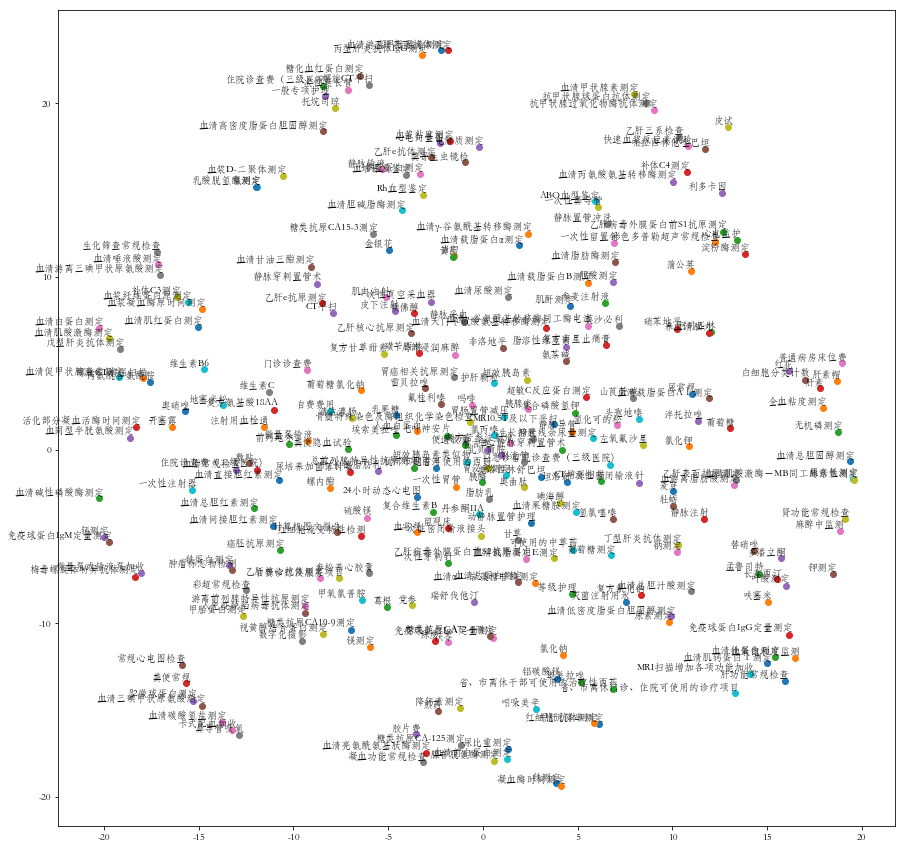

In [118]:
# Step 6: Visualize the embeddings.

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    # 设置图片大小
    plt.figure(figsize=(15, 15))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

try:
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')# mac：method='exact'
    # 画500个点
    plot_only = 500
    low_dim_embs = []
    labels = []
    for line in df.itertuples():
        t2 = list(set(line[2])-set(line[1]))
        for i in line[1]:
            t2.append(i)
            for ii in t2:
                labels.append(ii.strip())
                low_dim_embs.append(model.wv.__getitem__(ii.strip()))
        break
            
    low_dim_embs = tsne.fit_transform(np.array(low_dim_embs))        
    plot_with_labels(low_dim_embs, labels)

except ImportError:
    print("Please install sklearn, matplotlib, and scipy to visualize embeddings.")

In [43]:
model.wv.similarity("胰腺炎", "艾司唑仑")

0.013466876

In [42]:
model.wv.similarity("胰腺炎", "红细胞沉降率测定")

0.14645562

In [41]:
model.wv.similarity("胰腺炎", "胃肠置管减压")

0.1919024

In [39]:
model.wv.similarity("胰腺炎", "胆囊炎")

-0.03224509

In [40]:
model.wv.similarity("胰腺炎", "普通病")

0.16480318

### 感觉iter=10要好于iter=5的

In [45]:
model.wv.init_sims(replace=True)#Precompute L2-normalized vectors.
model.save('tt.model')

In [46]:
model1.wv.init_sims(replace=True)#Precompute L2-normalized vectors.
model1.save('tt1.model')

## 2、项目相似度

In [50]:
import pickle
with open('dict1.pkl', 'rb') as f:
    dict1 = pickle.load(f)

In [58]:
dict1.keys()

dict_keys(['普通病房床位费', '住院诊查费', '静脉输液', '自费诊疗及服务项目', '氯化钠', '非洛地平', '莫沙必利', '维生素B6', '泮托拉唑', '维生素C', '复方甘草甜素', '葡萄糖氯化钠', '氯化钾', '葡萄糖', '等级护理', '硝苯地平', '静脉注射', '一次性注射器', '一次性真空采血器', '七叶神安片', '胰酶', '开塞露', '血清碱性磷酸酶测定', '血清胆碱脂酶测定', '血清α-L-岩藻糖苷酶测定', '腺苷脱氨酶测定', '乳酸脱氢酶测定', '超敏C反应蛋白测定', '淀粉酶测定', '血清脂肪酶测定', '钾测定', '钠测定', '氯测定', '钙测定', '尿素氮测定', '血清白蛋白测定', 'β2微球蛋白测定', '静脉采血', '血清唾液酸测定', '血清总胆固醇测定', '血清甘油三酯测定', '血清高密度脂蛋白胆固醇测定', '血清低密度脂蛋白胆固醇测定', '血清载脂蛋白AⅠ测定', '血清载脂蛋白B测定', '血清载脂蛋白α测定', '无机磷测定', '镁测定', '铁测定', '血清总胆红素测定', '血清直接胆红素测定', '血清间接胆红素测定', '血清总胆汁酸测定', '血清丙氨酸氨基转移酶测定', '吲哚美辛', '血常规', '血清前白蛋白测定', '血清总蛋白测定', '视黄醇结合蛋白测定', '葡萄糖测定', '血清果糖胺测定', '血同型半胱氨酸测定', '血清天门冬氨酸氨基转移酶测定', '肌酐测定', '血清尿酸测定', '血清γ-谷氨酰基转移酶测定', '铝碳酸镁', '乳果糖', '复方南星止痛膏', '血清肌钙蛋白Ⅰ测定', '血清肌红蛋白测定', '血清肌酸激酶－MB同工酶活性测定', '计算机图文报告', '彩色多普勒超声常规检查', '奥美拉唑', '吗啡', '糖类抗原CA19-9测定', '癌胚抗原测定', '糖类抗原CA72-4测定', '胃癌相关抗原测定', '总前列腺特异性抗原测定', '甲胎蛋白测定', '血清铁蛋白测定', '游离前列腺特异性抗原测定', '糖类抗原CA-125测定', '托烷司琼', '氟桂利嗪', '养血清脑丸', '复方苦参注射液', '膀胱残余尿量测定', '彩超常规检查', '坦洛新', 

In [51]:
len(dict1['普通病房床位费'])

633553

In [52]:
len(dict1.keys())

6506

In [53]:
print(datetime.now())
import random
# import tqdm
from matplotlib.cbook import flatten
train_set = []
count = 0
for k, v in dict1.items():
    if count % 1000 == 0:
        print(count)
        print(len(train_set))
    count += 1
    t2 = [i for i in v if i != k]
    tl = [k] * len(t2)
    for _ in range(3):
        random.shuffle(t2)
        tc = list(flatten(zip(tl, t2)))
        train_set.append(tc)
print(datetime.now())            

0
0
1000
3000
2000
6000
3000
9000
4000
12000
5000
15000
6000
18000


In [54]:
len(train_set)

19518

In [55]:
from gensim.models import Word2Vec
import multiprocessing
from datetime import datetime

In [56]:
print(datetime.now())
model = Word2Vec(train_set, size=128, window=3, min_count=1,
        workers=multiprocessing.cpu_count(), iter=5)
print(datetime.now())

2019-05-27 12:11:29.665565
2019-05-27 12:14:18.004046


In [57]:
print(datetime.now())
model1 = Word2Vec(train_set, size=128, window=3, min_count=1,
        workers=multiprocessing.cpu_count(), iter=10)
print(datetime.now())

2019-05-27 12:14:18.011659
2019-05-27 12:19:27.655637


In [59]:
model1.wv.most_similar("住院诊查费")

[('等级护理', 0.8800166845321655),
 ('普通病房床位费', 0.8726457357406616),
 ('血同型半胱氨酸测定', 0.7633265256881714),
 ('腺苷脱氨酶测定', 0.740574836730957),
 ('血清载脂蛋白α测定', 0.7199350595474243),
 ('血清胆碱脂酶测定', 0.7148925065994263),
 ('镁测定', 0.7005707025527954),
 ('一般专项护理', 0.6998199820518494),
 ('自费诊疗及服务项目', 0.6953890323638916),
 ('静脉输液', 0.6922810077667236)]

In [60]:
model1.wv.most_similar("静脉输液")

[('氯化钠', 0.8794787526130676),
 ('葡萄糖', 0.7782113552093506),
 ('一次性注射器', 0.7655402421951294),
 ('普通病房床位费', 0.7283268570899963),
 ('等级护理', 0.7168303728103638),
 ('维生素B6', 0.7166968584060669),
 ('维生素C', 0.7048251628875732),
 ('住院诊查费', 0.6922808885574341),
 ('一次性留置针', 0.6818814277648926),
 ('血清肌酸激酶－MB同工酶活性测定', 0.665881872177124)]

In [61]:
model1.wv.most_similar("吗啡")

[('鸦胆子油乳注射液', 0.5253450870513916),
 ('羟考酮', 0.5215893983840942),
 ('艾迪注射液', 0.5128599405288696),
 ('参麦注射液', 0.5075509548187256),
 ('华蟾素胶囊', 0.501209020614624),
 ('甲地孕酮', 0.4984108805656433),
 ('威麦宁胶囊', 0.4980360269546509),
 ('复方苦参注射液', 0.49299606680870056),
 ('鸦胆子油软胶囊', 0.48977595567703247),
 ('动静脉置管护理', 0.4879089891910553)]

In [62]:
model1.wv.most_similar("钙测定")

[('无机磷测定', 0.862442135810852),
 ('镁测定', 0.854602038860321),
 ('血清载脂蛋白B测定', 0.8462041616439819),
 ('血清载脂蛋白AⅠ测定', 0.8363343477249146),
 ('血清载脂蛋白α测定', 0.829663097858429),
 ('钾测定', 0.8283734321594238),
 ('血清总胆汁酸测定', 0.8267446756362915),
 ('腺苷脱氨酶测定', 0.8234133720397949),
 ('钠测定', 0.8232506513595581),
 ('血清肌酸激酶－MB同工酶活性测定', 0.812242865562439)]

In [64]:
model1.wv.most_similar("常规心电图检查")

[('心电向量图', 0.7539894580841064),
 ('血浆D-二聚体测定', 0.6976851224899292),
 ('铁蛋白测定', 0.6859366297721863),
 ('糖类抗原CA15-3测定', 0.6747887134552002),
 ('乙肝三系检查', 0.6723875999450684),
 ('Rh血型鉴定', 0.6624627113342285),
 ('血清肌酸激酶测定', 0.6520456075668335),
 ('镁测定', 0.6507502794265747),
 ('丙型肝炎抗体IgG测定', 0.6491758823394775),
 ('ABO血型鉴定', 0.6453269124031067)]

In [65]:
model1.wv.most_similar("胶片费")

[('螺旋CT平扫', 0.7802066206932068),
 ('数字化摄影', 0.7673364281654358),
 ('CT平扫', 0.6875658631324768),
 ('16层及以上多排螺旋CT扫描加收', 0.6471721529960632),
 ('磁共振扫描', 0.5194222331047058),
 ('省、市离休门诊、住院可使用的一次性材料', 0.4913162887096405),
 ('MRI扫描增加各项功能加收', 0.49005669355392456),
 ('治伤胶囊', 0.4890681803226471),
 ('门急诊留观诊查费', 0.48463764786720276),
 ('替扎尼定', 0.47736436128616333)]

In [66]:
model1.wv.most_similar("引流管")

[('静脉导管', 0.6394505500793457),
 ('引流装置', 0.6243891716003418),
 ('更换引流装置', 0.5950469970703125),
 ('脂肪乳氨基酸葡萄糖', 0.5534721612930298),
 ('术后引流', 0.5523264408111572),
 ('胃肠置管减压', 0.5456271171569824),
 ('胸腔镜手术治疗加收', 0.5378265380859375),
 ('中心静脉穿刺置管术', 0.523317277431488),
 ('深静脉导管', 0.5222755074501038),
 ('中/长链脂肪乳', 0.5220312476158142)]

In [67]:
model1.wv.most_similar("阿莫西林")

[('头孢拉定', 0.8137551546096802),
 ('头孢羟氨苄', 0.7592645287513733),
 ('牛黄解毒丸', 0.746630847454071),
 ('头孢他美酯', 0.7374624609947205),
 ('酚麻美敏', 0.7259061336517334),
 ('阿莫西林克拉维酸', 0.6993011832237244),
 ('牛黄上清丸', 0.6979542374610901),
 ('罗红霉素', 0.6977894306182861),
 ('复方氨酚烷胺', 0.6972893476486206),
 ('珍黄丸', 0.6743109226226807)]

In [68]:
model1.wv.init_sims(replace=True)#Precompute L2-normalized vectors.
model1.save('tt_dict.model')